In [25]:
%pylab inline
import skimage.io as skio
from PIL import Image
import os.path

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


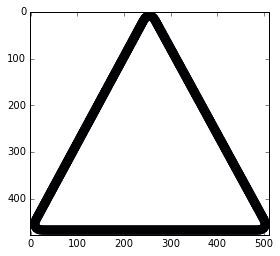

In [2]:
tri = skio.imread('{0}/{1}'.format("triangles","0.png"))
plt.imshow(tri)

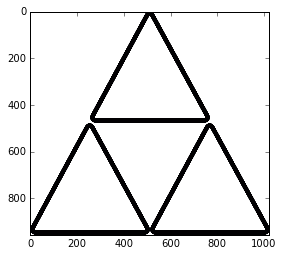

In [3]:
width = tri.shape[1]
top = np.zeros_like(tri)
top = np.hstack((top,top))
top[:,width//2:3*width//2] = tri
bottom = np.hstack((tri,tri))
plt.imshow(np.vstack((top,bottom)))

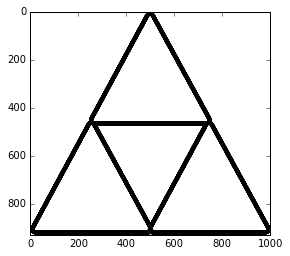

In [24]:
h,w,c = tri.shape
h_comb, w_comb = 25,25

recurse_shape = h*2-h_comb,w*2-w_comb,c
left_offset = (w-w_comb)//2
height_offset = h-h_comb
width_offset = w-w_comb

bg = Image.fromarray(np.zeros(recurse_shape, dtype="uint8"))
pil_tri = Image.fromarray(tri)

bg.paste(pil_tri, (left_offset, 0), mask=pil_tri)
bg.paste(pil_tri, (0, height_offset), mask=pil_tri)
bg.paste(pil_tri, (width_offset, height_offset), mask=pil_tri)
plt.imshow(bg)
bg.save('{0}/{1}'.format("triangles","1.png"))

In [33]:
def serp_iter(i, intersect, folder):
    tri = skio.imread('{1}/{0}.png'.format(i-1, folder))
    pil_tri = Image.fromarray(tri)
    h,w,c = tri.shape
    w_intersect, h_intersect = intersect

    recurse_shape = h*2-h_comb,w*2-w_comb,c
    height_offset = h-h_intersect
    width_offset = w-w_intersect

    bg = Image.fromarray(np.zeros(recurse_shape, dtype="uint8"))
    bg.paste(pil_tri, (width_offset//2, 0), mask=pil_tri)
    bg.paste(pil_tri, (0, height_offset), mask=pil_tri)
    bg.paste(pil_tri, (width_offset, height_offset), mask=pil_tri)
    bg.save('{1}/{0}.png'.format(i, folder))
    
def serpenski(n, intersect=(0,0), folder="triangles"):
    for i in range(1,n+1):
        if not os.path.isfile("{1}/{0}.png".format(i, folder)):
            print("[srp] {0} starting".format(i))
            serp_iter(i, intersect, folder)
            
serpenski(4, (25,25))

[srp] 2 starting
[srp] 3 starting
[srp] 4 starting
